<a href="https://colab.research.google.com/github/jonatanriq/oceanografia/blob/main/analise_simcosta_ipanema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Ajustando o DataSet

In [2]:
dados = pd.read_csv('/content/SIMCOSTA_RJ-4_OCEAN_2017-08-28_2021-11-12.csv',skiprows=21)
dados.index = pd.to_datetime(dados[['YEAR', 'MONTH', 'DAY', 'HOUR']])
dados = dados[dados.index < '2020']
dados = dados[dados.columns[6:]]
dados

,Hsig,TP,Avg_Wv_Dir,Avg_Wv_Dir_N,Avg_Cel1_Mag,Avg_Cel1_Dir,Avg_Cel1_Dir_N,M_Decl,Tsig
2017-08-28 13:00:00,0.94,8.7,162.0,139.26,17.31,166.80,144.06,-22.74,7.0
2017-08-28 13:00:00,0.96,6.5,163.0,140.26,48.28,151.29,128.55,-22.74,NaN
2017-08-28 14:00:00,0.89,6.1,161.0,138.26,36.87,37.97,15.23,-22.74,NaN
2017-08-28 15:00:00,0.90,10.0,161.0,138.26,49.48,61.31,38.57,-22.74,7.2
2017-08-28 15:00:00,0.91,9.1,164.0,141.26,63.83,76.64,53.90,-22.74,NaN
...,...,...,...,...,...,...,...,...,...
2019-12-31 21:00:00,0.82,4.5,154.0,131.03,68.31,5.49,342.52,-22.97,4.7
2019-12-31 21:00:00,0.86,4.5,156.0,133.03,86.63,312.52,289.55,-22.97,NaN
2019-12-31 22:00:00,0.77,4.9,157.0,134.03,191.36,300.40,277.43,-22.97,4.8
2019-12-31 22:00:00,0.81,5.1,163.0,140.03,202.75,298.31,275.34,-22.97,NaN


In [3]:
!pip install windrose

In [4]:
from windrose import WindroseAxes

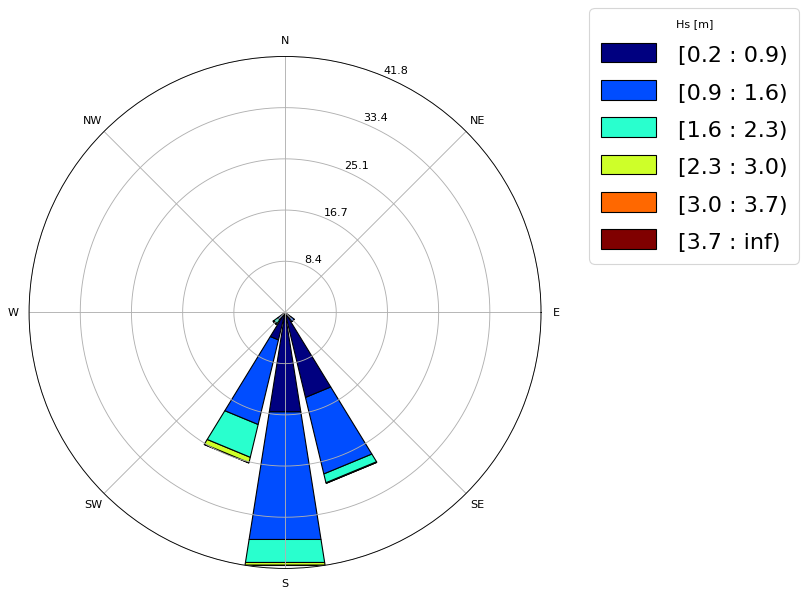

In [5]:
new_labels = ["E", "NE", "N", "NW", "W", "SW", "S", "SE"]

ax = WindroseAxes.from_ax(theta_labels=new_labels)

ax.bar(dados.loc[(dados.index > '2017-08-28') & (dados.index < '2020-01-01')]['Avg_Wv_Dir'], # dados de direção
       dados.Hsig.loc[(dados.index > '2017-08-28') & (dados.index < '2020-01-01')], # dados de altura
       normed=True, opening=0.8, edgecolor='black') # outros parâmetros


lgd = ax.set_legend(title='Hs [m]',prop=dict(size=25), 
                    bbox_to_anchor=(1.1, 0.6))

plt.setp(lgd.get_texts(),
         fontsize=20) 

plt.savefig('rosa_ondas.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


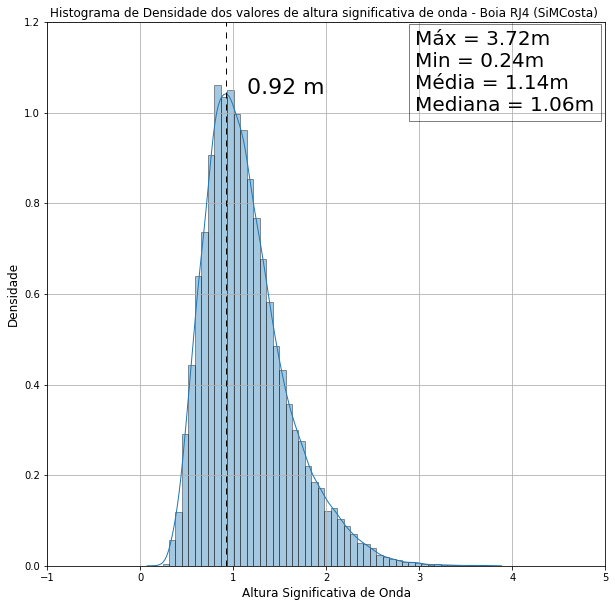

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle


boia = dados 

fig, ax = plt.subplots(figsize=(10,10))
plt.style.use('classic')

histograma = sns.distplot(boia.Hsig[boia.index < '2020-01'],norm_hist=True)
ax.set_ylabel('Densidade', fontsize=12)
ax.set_xlabel('Altura Significativa de Onda', fontsize=12)
ax.set_title('Histograma de Densidade dos valores de altura significativa de onda - Boia RJ4 (SiMCosta) ', fontsize=12)

x,y = histograma.get_lines()[0].get_data()
plt.axvline(x=x[np.argmax(y)],color='k',linestyle='--',linewidth=1)
plt.text(x[np.argmax(y)],np.max(y),f'   {x[np.argmax(y)]:.2f} m',fontsize=22)
# plt.text(2.63, 1.3-0.02, f'Média = {boia_interp.mean():.2f}m', fontsize=12)
# plt.text(2.63, 1.26-0.02, f'Mediana = {boia_interp.median():.2f}m', fontsize=12)
# plt.text(2.63, 1.22-0.02, f'Máx = {boia_interp.max():.2f}m', fontsize=12)
# plt.text(2.63, 1.18-0.02, f'Min = {boia_interp.min():.2f}m', fontsize=12)

textstr = (f'Máx = {boia.Hsig.max():.2f}m\nMin = {boia.Hsig.min():.2f}m\nMédia = {boia.Hsig.mean():.2f}m\nMediana = {boia.Hsig.median():.2f}m')
props = dict(boxstyle='square', alpha=0.5, facecolor='none')

ax.text(0.66, 0.985, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)

plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


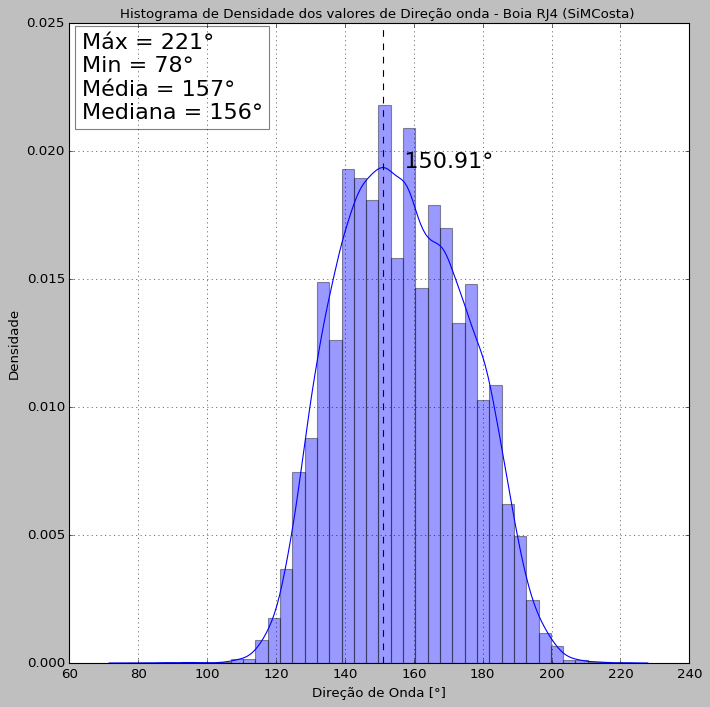

In [7]:
fig, ax = plt.subplots(figsize=(10,10))

boia_dir = boia['Avg_Wv_Dir_N']

histograma = sns.distplot(boia['Avg_Wv_Dir_N'].loc[boia.index < '2020-01'],norm_hist=True, bins=40)

ax.set_ylabel('Densidade', fontsize=12)
ax.set_xlabel('Direção de Onda [°]', fontsize=12)
ax.set_title('Histograma de Densidade dos valores de Direção onda - Boia RJ4 (SiMCosta) ', fontsize=12)

text = (f'Máx = {boia_dir.max():.0f}°\nMin = {boia_dir.min():.0f}°\nMédia = {boia_dir.mean():.0f}°\nMediana = {boia_dir.median():.0f}°')
ax.text(0.02, 0.985, text, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)

x,y = histograma.get_lines()[0].get_data()
plt.axvline(x=x[np.argmax(y)],color='k',linestyle='--',linewidth=1)
plt.text(x[np.argmax(y)],np.max(y),f'   {x[np.argmax(y)]:.2f}°',fontsize=20)

plt.grid()
plt.show()

## Vamos verificar a correlação entre ventos e ondas

In [8]:
ventos = pd.read_csv('/content/SIMCOSTA_RJ-4_MET_2017-08-28_2020-01-01.csv', skiprows=14)
ventos.index = pd.to_datetime(ventos[['YEAR', 'MONTH', 'DAY', 'HOUR']])
ventos = ventos[ventos.columns[6:]]
ventos = ventos[ventos.index < '2020'] # valores vão até 2020
ventos

,Avg_Wnd_Sp,Avg_Wnd_Dir,Avg_Wnd_Dir_N,M_Decl
2017-08-28 13:00:00,3.5,233.0,210.26,-22.74
2017-08-28 13:00:00,3.9,246.0,223.26,-22.74
2017-08-28 14:00:00,4.3,248.0,225.26,-22.74
2017-08-28 15:00:00,5.0,247.0,224.26,-22.74
2017-08-28 15:00:00,4.4,230.0,207.26,-22.74
...,...,...,...,...
2019-12-31 21:00:00,3.2,112.0,89.03,-22.97
2019-12-31 21:00:00,0.9,235.0,212.03,-22.97
2019-12-31 22:00:00,0.7,209.0,186.03,-22.97
2019-12-31 22:00:00,1.4,275.0,252.03,-22.97


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


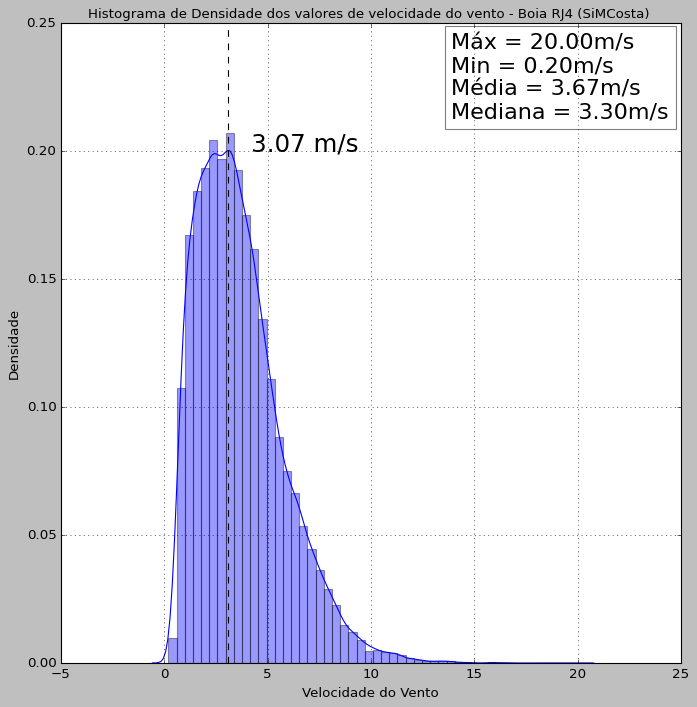

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle


boia = dados 

fig, ax = plt.subplots(figsize=(10,10))

histograma = sns.distplot(ventos['Avg_Wnd_Sp'][ventos.index < '2020-01'],norm_hist=True)
ax.set_ylabel('Densidade', fontsize=12)
ax.set_xlabel('Velocidade do Vento', fontsize=12)
ax.set_title('Histograma de Densidade dos valores de velocidade do vento - Boia RJ4 (SiMCosta) ', fontsize=12)

x,y = histograma.get_lines()[0].get_data()
plt.axvline(x=x[np.argmax(y)],color='k',linestyle='--',linewidth=1)
plt.text(x[np.argmax(y)],np.max(y),f'   {x[np.argmax(y)]:.2f} m/s',fontsize=22)
# plt.text(2.63, 1.3-0.02, f'Média = {boia_interp.mean():.2f}m', fontsize=12)
# plt.text(2.63, 1.26-0.02, f'Mediana = {boia_interp.median():.2f}m', fontsize=12)
# plt.text(2.63, 1.22-0.02, f'Máx = {boia_interp.max():.2f}m', fontsize=12)
# plt.text(2.63, 1.18-0.02, f'Min = {boia_interp.min():.2f}m', fontsize=12)

textstr = (f'Máx = {ventos.Avg_Wnd_Sp.max():.2f}m/s\nMin = {ventos.Avg_Wnd_Sp.min():.2f}m/s\nMédia = {ventos.Avg_Wnd_Sp.mean():.2f}m/s\nMediana = {ventos.Avg_Wnd_Sp.median():.2f}m/s')
props = dict(boxstyle='square', alpha=0.5, facecolor='none')

ax.text(0.63, 0.985, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)

plt.grid()
plt.show()

Vou criar um dataframe com os valores interpolados para 3 horas!

Ou seja, meu dado terá observações de 3 em 3 horas.

In [10]:
novo = pd.DataFrame()

novo['hsig'] = boia.Hsig.resample('3H').mean().interpolate(method ='linear', limit_direction ='forward')
novo['wvdir'] =  boia.Avg_Wv_Dir_N.resample('3H').mean().interpolate(method ='linear', limit_direction ='forward')


novo['vel_vento'] = ventos[ventos.columns[0]].resample('3H').mean().interpolate(method ='linear', limit_direction ='forward')
novo['dir_vento'] = ventos[ventos.columns[1]].resample('3H').mean().interpolate(method ='linear', limit_direction ='forward')

mask = np.sqrt((novo['dir_vento'] - novo['wvdir'])**2) < 45 # quero que a diferença entre a direção dos ventos e das ondas seja menor que 45 graus
novo = novo[mask]

novo

,hsig,wvdir,vel_vento,dir_vento
2017-08-29 09:00:00,0.841667,128.926667,1.516667,96.166667
2017-08-31 03:00:00,0.643333,138.593333,2.566667,139.833333
2017-09-01 09:00:00,1.663333,180.583333,2.033333,180.000000
2017-09-01 12:00:00,1.698333,176.250000,1.966667,204.166667
2017-09-01 15:00:00,1.780000,174.916667,2.650000,178.750000
...,...,...,...,...
2019-12-31 06:00:00,0.652000,122.230000,2.020000,89.600000
2019-12-31 09:00:00,0.635000,134.863333,1.316667,135.000000
2019-12-31 12:00:00,0.593333,133.530000,2.650000,154.500000
2019-12-31 15:00:00,0.613333,129.696667,4.316667,156.000000


Vou calcular o Z Score da velocidade do vento e da altura significativa de onda

In [11]:
from scipy import stats

novo['zscore_vel_vento'] = stats.zscore(novo.vel_vento)
novo['zscore_hsig'] = stats.zscore(novo.hsig)

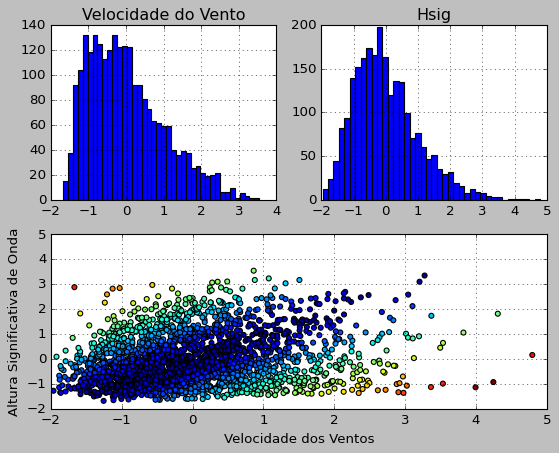

In [12]:
import matplotlib.gridspec as gridspec



gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.5)


ax1 = plt.subplot(gs[0, :2], )
ax2 = plt.subplot(gs[0, 2:])
ax3 = plt.subplot(gs[1, :])

ax1.hist(novo[novo.columns[-2]], bins=40)
ax1.set_title('Velocidade do Vento')
ax1.grid()

ax2.hist(novo[novo.columns[-1]], bins=40)
ax2.set_title('Hsig')
ax2.grid()

# criando o diferenciador
diff = novo[novo.columns[-2]] - novo[novo.columns[-1]]


ax3.scatter(novo[novo.columns[-1]], novo[novo.columns[-2]], c=np.abs(diff))
ax3.set_xlabel('Velocidade dos Ventos')
ax3.set_ylabel('Altura Significativa de Onda')
ax3.grid()
ax3.set_xlim(-2,5)
ax3.set_ylim(-2,5)

plt.show()

As curvas de Z score são ligeiramente diferentes. No plot comparando ambos os Z Scores, se observa que mesmo valores altos de Z score pra velocidade do vento provocam valores baixos de Z Score em Hsig. Isso pode ser causado pelo potencial de cada direção de vento em ocasionar mudança na hsig. Ou seja, o prórpio plot de Z Scores mostra a segmentação dos diferentes comportamentos na relação ventos e ondas.

In [13]:
# discretizando os valores
import numpy as np
nomes = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
direcoes = np.arange(0,361,22.5)

bins = direcoes
labels = nomes
novo['dir_ventos'] = pd.cut(novo['dir_vento'], bins=bins, labels=labels)
novo['dir_ondas'] = pd.cut(novo['wvdir'], bins=bins, labels=labels)
novo

,hsig,wvdir,vel_vento,dir_vento,zscore_vel_vento,zscore_hsig,dir_ventos,dir_ondas
2017-08-29 09:00:00,0.841667,128.926667,1.516667,96.166667,-1.166367,-0.786692,E,ESE
2017-08-31 03:00:00,0.643333,138.593333,2.566667,139.833333,-0.585336,-1.259541,SE,SE
2017-09-01 09:00:00,1.663333,180.583333,2.033333,180.000000,-0.880463,1.172253,SSE,S
2017-09-01 12:00:00,1.698333,176.250000,1.966667,204.166667,-0.917353,1.255697,SSW,SSE
2017-09-01 15:00:00,1.780000,174.916667,2.650000,178.750000,-0.539222,1.450399,SSE,SSE
...,...,...,...,...,...,...,...,...
2019-12-31 06:00:00,0.652000,122.230000,2.020000,89.600000,-0.887841,-1.238879,ENE,ESE
2019-12-31 09:00:00,0.635000,134.863333,1.316667,135.000000,-1.277039,-1.279409,ESE,ESE
2019-12-31 12:00:00,0.593333,133.530000,2.650000,154.500000,-0.539222,-1.378747,SE,ESE
2019-12-31 15:00:00,0.613333,129.696667,4.316667,156.000000,0.383050,-1.331064,SE,ESE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


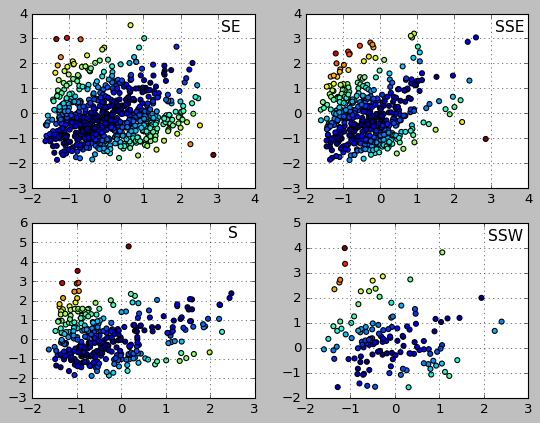

In [14]:

gs = gridspec.GridSpec(2, 8)
gs.update(wspace=3)
ax1 = plt.subplot(gs[0, :4])
ax2 = plt.subplot(gs[0, 4:])
ax3 = plt.subplot(gs[1, :4])
ax4 = plt.subplot(gs[1, 4:])


ax1.scatter(novo['zscore_vel_vento'][novo['dir_ventos'] == 'SE'], novo.zscore_hsig[novo['dir_ventos'] == 'SE'],
            c=np.abs(novo['zscore_vel_vento'][novo['dir_ventos'] == 'SE'] - novo.zscore_hsig[novo['dir_ventos'] == 'SE']))
# ax1.set_xlabel('Velocidade dos Ventos')
# ax1.set_ylabel('Altura Significativa de Onda')
ax1.text(3.1,3.3,'SE', fontsize=14)
ax1.grid()


ax2.scatter(novo['zscore_vel_vento'][novo['dir_ventos'] == 'SSE'], novo.zscore_hsig[novo['dir_ventos'] == 'SSE'],
            c=np.abs(novo['zscore_vel_vento'][novo['dir_ventos'] == 'SSE'] - novo.zscore_hsig[novo['dir_ventos'] == 'SSE']))
# ax2.set_xlabel('Velocidade dos Ventos')
# ax2.set_ylabel('Altura Significativa de Onda')
ax2.text(3.1,3.3,'SSE', fontsize=14)
ax2.grid()

ax3.scatter(novo['zscore_vel_vento'][novo['dir_ventos'] == 'S'], novo.zscore_hsig[novo['dir_ventos'] == 'S'],
            c=np.abs(novo['zscore_vel_vento'][novo['dir_ventos'] == 'S'] - novo.zscore_hsig[novo['dir_ventos'] == 'S']))
# ax3.set_xlabel('Velocidade dos Ventos')
# ax3.set_ylabel('Altura Significativa de Onda')
ax3.text(2.4,5.3,'S', fontsize=14,)
ax3.grid()

ax4.scatter(novo['zscore_vel_vento'][novo['dir_ventos'] == 'SSW'], novo.zscore_hsig[novo['dir_ventos'] == 'SSW'],
            c=np.abs(novo['zscore_vel_vento'][novo['dir_ventos'] == 'SSW'] - novo.zscore_hsig[novo['dir_ventos'] == 'SSW']))
#ax4.set_xlabel('Velocidade dos Ventos')
# ax4.set_ylabel('Altura Significativa de Onda')
ax4.text(2.1,4.3,'SSW', fontsize=14,)
ax4.grid()

plt.tight_layout(pad=1)



plt.show()

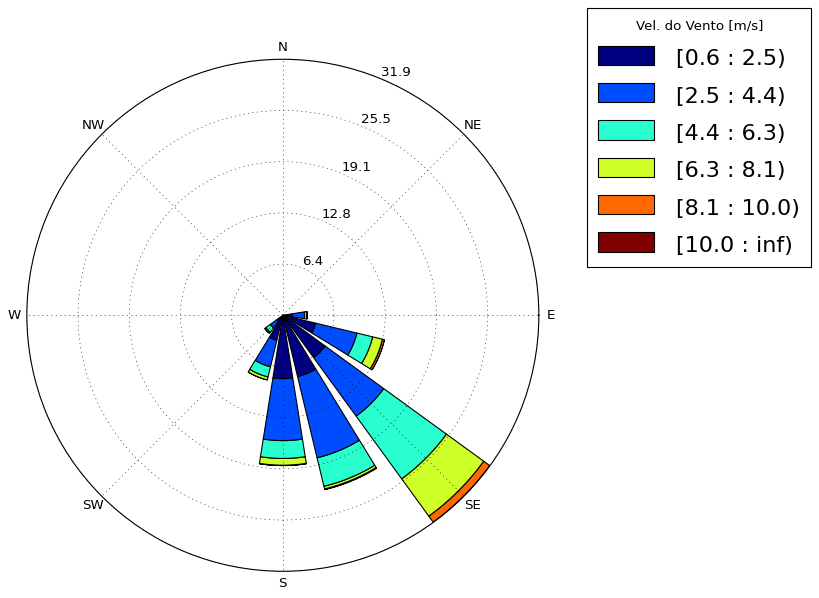

In [15]:
new_labels = ["E", "NE", "N", "NW", "W", "SW", "S", "SE"]

ax = WindroseAxes.from_ax(theta_labels=new_labels)

ax.bar(novo.loc[(novo.index > '2017-08-28') & (novo.index < '2020-01-01')]['dir_vento'], # dados de direção
       novo.vel_vento.loc[(novo.index > '2017-08-28') & (novo.index < '2020-01-01')], # dados de altura
       normed=True, opening=0.8, edgecolor='black') # outros parâmetros


lgd = ax.set_legend(title='Vel. do Vento [m/s]',prop=dict(size=25), 
                    bbox_to_anchor=(1.1, 0.6))

plt.setp(lgd.get_texts(),
         fontsize=20) 

plt.savefig('rosa_ondas.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

## Regressão Linear

A partir de agora vou realizar uma regressão linear de cada uma das direções, e verificar padrões e suas diferneças entre as direções.

O script e a ideia do código a seguir eu tirei [desse vídeo](https://www.youtube.com/watch?v=Te9LjUzQJyg&t=693s) que tem uma explicação bem sucinta mas ao mesmo tempo bem funcional do problema de regressão linear.

 *(o canal dele tem outros métodos de mahcine learning bem explicados, vale a pena consultar)*

In [16]:
import sklearn.model_selection as ms
import sklearn.linear_model as lm

In [17]:
novo.iloc[:,4:6].iloc[:,:-1]

,zscore_vel_vento
2017-08-29 09:00:00,-1.166367
2017-08-31 03:00:00,-0.585336
2017-09-01 09:00:00,-0.880463
2017-09-01 12:00:00,-0.917353
2017-09-01 15:00:00,-0.539222
...,...
2019-12-31 06:00:00,-0.887841
2019-12-31 09:00:00,-1.277039
2019-12-31 12:00:00,-0.539222
2019-12-31 15:00:00,0.383050


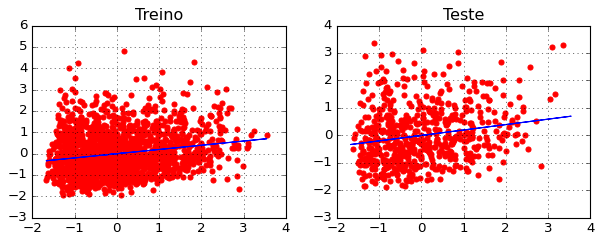

In [18]:
### ESTOU REALIZANDO A REGRESSÃO LINEAR EM TERMOS GERAIS (USANDO TODAS AS DIREÇÕES)

# vou dar o x e o y, que serão a velocidade do vento e a hsig
X, Y = novo.iloc[:,4:6].iloc[:,:-1], novo.iloc[:,4:6].iloc[:,-1]

# depois, vou separar os dados em treino e teste
X_train, X_test, y_train, y_test = ms.train_test_split(X, Y, random_state = 0)

# agora treino o modelo de regressão linear
regressor = lm.LinearRegression()
regressor.fit(X_train, y_train)

# Executando a Previsao
y_pred = regressor.predict(X_test)

fig, ax = plt.subplots(ncols=2, figsize=(9,3))
plt.style.use('classic')
fig.patch.set_facecolor('white')


# visualizando o treino
ax[0].scatter(X_train, y_train, color = 'red')
ax[0].plot(X_train, regressor.predict(X_train), color = 'blue', scaley=False)
ax[0].set_title('Treino')
ax[0].grid()

# visuzalizando teste
ax[1].scatter(X_test, y_test, color = 'red')
ax[1].plot(X_train, regressor.predict(X_train), color = 'blue', scaley=False)
ax[1].set_title('Teste')
ax[1].grid()

plt.show()

A reta não consegue prever com precisão os valores, tanto em teste quanto em treino. Parece que a regressão linear falha nesse aspecto. 

Um dos motivos pode ser a questão das direções mal filtradas. **Será que os ventos estão provocando realmente as ondas correspondentes??**

Essa é a pergunta que fica. Será que não vale a pena restringir **ainda mais** o range entre as direções entre ventos e ondas lá em cima na filtragem? Eu coloquei 45, mas será que não vale a pena reduzir pra no máximo 10? Talvez tenha uma linearidade ainda maior.

### Criando a função regressor

In [36]:
def regressao_linear(dataset):
  # vou dar o x e o y, que serão a velocidade do vento e a hsig
  X, Y = dataset.iloc[:,4:6].iloc[:,:-1], dataset.iloc[:,4:6].iloc[:,-1]

  # depois, vou separar os dados em treino e teste
  X_train, X_test, y_train, y_test = ms.train_test_split(X, Y, random_state = 0)

  # agora treino o modelo de regressão linear
  regressor = lm.LinearRegression()
  regressor.fit(X_train, y_train)

  # Executando a Previsao
  y_pred = regressor.predict(X_test)

  fig, ax = plt.subplots(ncols=2, figsize=(9,3))
  plt.style.use('classic')
  fig.patch.set_facecolor('white')


  # visualizando o treino
  ax[0].scatter(X_train, y_train, color = 'red')
  ax[0].plot(X_train, regressor.predict(X_train), color = 'blue', scaley=False)
  ax[0].set_title('Treino')
  ax[0].grid()

  # visuzalizando teste
  ax[1].scatter(X_test, y_test, color = 'red')
  ax[1].plot(X_train, regressor.predict(X_train), color = 'blue', scaley=False)
  ax[1].set_title('Teste')
  ax[1].grid()

  plt.show()

### Criando as Regressões

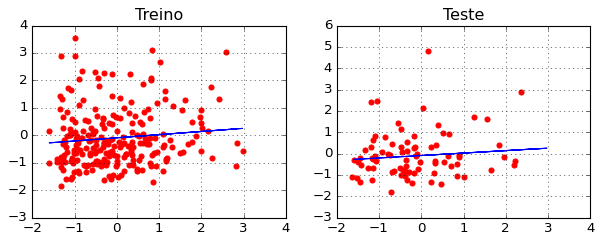

In [37]:
novo1 = novo[(novo['dir_ondas'] == novo['dir_ventos']) & (novo['wvdir'] - novo['dir_vento'] < 1)]
regressao_linear(novo1)

Não é o que acontece. Segue não havendo linearidade. Talvez se eu filtrar o dataset pra diferença dos ZScore sendo menor do que 0.1 tenha linearidade. Vou testar:

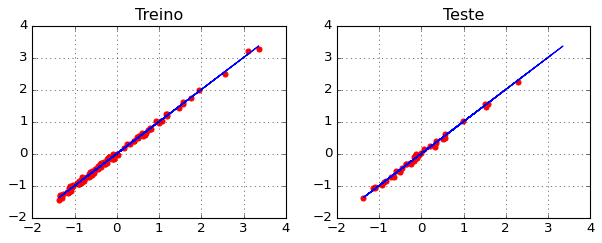

In [38]:
novo1 = novo[np.sqrt((novo['zscore_vel_vento'] - novo['zscore_hsig'])**2) < 0.1]
regressao_linear(novo1)

Agora foi. Com as diferenças entre os Z Scores menores que 0.1 apresentou caráter linear. Mas isso é um caso MUITO ESPECÍFICO. Onde as ondas apresentaram a diferença de direção menor do que 1 e a diferença entre o Z Score menor do que 0.1.

## Interpolando Horário & Dir_Vento - Dir_Onda < 15

In [41]:
novo = pd.DataFrame()

novo['hsig'] = boia.Hsig.resample('1H').mean().interpolate(method ='linear', limit_direction ='forward')
novo['wvdir'] =  boia.Avg_Wv_Dir_N.resample('1H').mean().interpolate(method ='linear', limit_direction ='forward')


novo['vel_vento'] = ventos[ventos.columns[0]].resample('1H').mean().interpolate(method ='linear', limit_direction ='forward')
novo['dir_vento'] = ventos[ventos.columns[1]].resample('1H').mean().interpolate(method ='linear', limit_direction ='forward')

mask = np.sqrt((novo['dir_vento'] - novo['wvdir'])**2) < 15 # quero que a diferença entre a direção dos ventos e das ondas seja menor que 45 graus
novo = novo[mask]

novo

,hsig,wvdir,vel_vento,dir_vento
2017-08-29 10:00:00,0.850,126.76,1.55,123.0
2017-08-30 23:00:00,0.695,131.26,1.00,146.0
2017-08-31 03:00:00,0.675,140.76,1.55,129.0
2017-09-01 10:00:00,1.680,181.25,1.90,186.5
2017-09-01 11:00:00,1.630,179.25,2.30,167.0
...,...,...,...,...
2019-12-31 07:00:00,0.665,120.03,2.20,111.5
2019-12-31 09:00:00,0.650,131.03,1.10,116.5
2019-12-31 11:00:00,0.625,139.53,2.00,138.0
2019-12-31 12:00:00,0.640,135.53,3.10,143.0


In [42]:
from scipy import stats

novo['zscore_vel_vento'] = stats.zscore(novo.vel_vento)
novo['zscore_hsig'] = stats.zscore(novo.hsig)

Verificando o panorama geral de zscore...

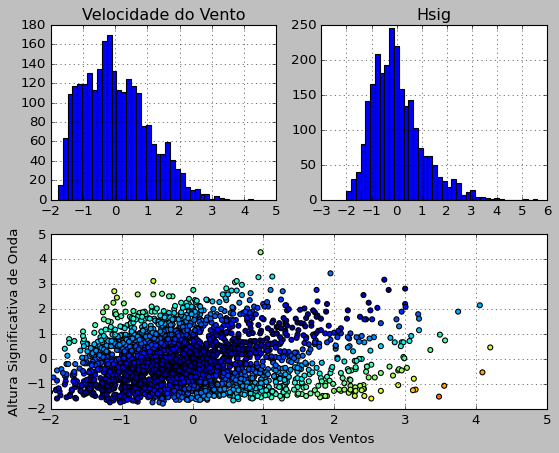

In [43]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.5)


ax1 = plt.subplot(gs[0, :2], )
ax2 = plt.subplot(gs[0, 2:])
ax3 = plt.subplot(gs[1, :])

ax1.hist(novo[novo.columns[-2]], bins=40)
ax1.set_title('Velocidade do Vento')
ax1.grid()

ax2.hist(novo[novo.columns[-1]], bins=40)
ax2.set_title('Hsig')
ax2.grid()

# criando o diferenciador
diff = novo[novo.columns[-2]] - novo[novo.columns[-1]]


ax3.scatter(novo[novo.columns[-1]], novo[novo.columns[-2]], c=np.abs(diff))
ax3.set_xlabel('Velocidade dos Ventos')
ax3.set_ylabel('Altura Significativa de Onda')
ax3.grid()
ax3.set_xlim(-2,5)
ax3.set_ylim(-2,5)

plt.show()

aplicando a discretização dos valores

In [44]:
# discretizando os valores
import numpy as np
nomes = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
direcoes = np.arange(0,361,22.5)

bins = direcoes
labels = nomes
novo['dir_ventos'] = pd.cut(novo['dir_vento'], bins=bins, labels=labels)
novo['dir_ondas'] = pd.cut(novo['wvdir'], bins=bins, labels=labels)
novo

,hsig,wvdir,vel_vento,dir_vento,zscore_vel_vento,zscore_hsig,dir_ventos,dir_ondas
2017-08-29 10:00:00,0.850,126.76,1.55,123.0,-1.196094,-0.725230,ESE,ESE
2017-08-30 23:00:00,0.695,131.26,1.00,146.0,-1.477917,-1.105088,SE,ESE
2017-08-31 03:00:00,0.675,140.76,1.55,129.0,-1.196094,-1.154103,ESE,SE
2017-09-01 10:00:00,1.680,181.25,1.90,186.5,-1.016753,1.308853,S,S
2017-09-01 11:00:00,1.630,179.25,2.30,167.0,-0.811791,1.186318,SSE,SSE
...,...,...,...,...,...,...,...,...
2019-12-31 07:00:00,0.665,120.03,2.20,111.5,-0.863031,-1.178610,E,ESE
2019-12-31 09:00:00,0.650,131.03,1.10,116.5,-1.426677,-1.215370,ESE,ESE
2019-12-31 11:00:00,0.625,139.53,2.00,138.0,-0.965512,-1.276638,SE,SE
2019-12-31 12:00:00,0.640,135.53,3.10,143.0,-0.401867,-1.239877,SE,SE


Aplicando a regressão linear...

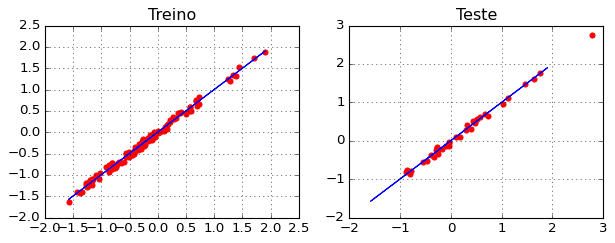

In [47]:
novo1 = novo[(np.sqrt((novo['zscore_vel_vento'] - novo['zscore_hsig'])**2) < 0.1)]
regressao_linear(novo1)

Parece que o regressor possui a mesma performance de antes. Pode-se concluir então que filtrar pela direção não influencia fortemente na qualidade da regressão. Mas sim a filtragem pelo Z-Score. 

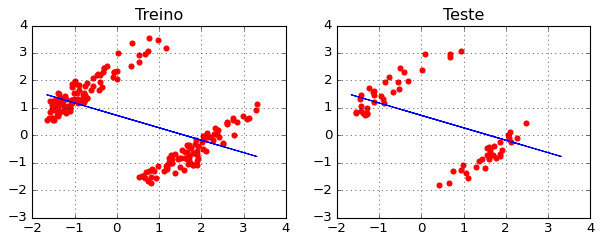

In [62]:
novo1 = novo[(np.sqrt((novo['zscore_vel_vento'] - novo['zscore_hsig'])**2) > 2) & (np.sqrt((novo['zscore_vel_vento'] - novo['zscore_hsig'])**2) < 3) ]
regressao_linear(novo1)

A filtragem serve justamente pra tirar isso. O que se observa nessa regressão falha é que existe um padrão, onde ventos fracos provocam ondas grandes e ventos fortes provocam ondas pequenas. Uma clara inconsistência.

Isso ocorre em um dataset filtrado em termos de direção. Aqui, a diferença entre as direções é menor do que 15 graus. O que afasta a possibilidade de um vento estrar soprando numa direção e a onda incidindo na outra.

**Mas será que estamos observando as MESMAS observações no tempo?**
SIM.


## Reavaliando o DataSet


Voltando tudo pro início, agora interpolando em 1 hora pra ter mais dados.

In [147]:
novo = pd.DataFrame()

novo['hsig'] = boia.Hsig.resample('1H').mean().interpolate(method ='linear', limit_direction ='forward')
novo['wvdir'] =  boia.Avg_Wv_Dir_N.resample('1H').mean().interpolate(method ='linear', limit_direction ='forward')


novo['vel_vento'] = ventos[ventos.columns[0]].resample('1H').mean().interpolate(method ='linear', limit_direction ='forward')
novo['dir_vento'] = ventos[ventos.columns[1]].resample('1H').mean().interpolate(method ='linear', limit_direction ='forward')

from scipy import stats

novo['zscore_vel_vento'] = stats.zscore(novo.vel_vento)
novo['zscore_hsig'] = stats.zscore(novo.hsig)

import numpy as np
nomes = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
direcoes = np.arange(0,361,22.5)

bins = direcoes
labels = nomes
novo['dir_ventos'] = pd.cut(novo['dir_vento'], bins=bins, labels=labels)
novo['dir_ondas'] = pd.cut(novo['wvdir'], bins=bins, labels=labels)

novo['dife'] = novo.zscore_vel_vento - novo.zscore_hsig

novo

,hsig,wvdir,vel_vento,dir_vento,zscore_vel_vento,zscore_hsig,dir_ventos,dir_ondas,dife
2017-08-28 13:00:00,0.950,139.76,3.70,239.5,0.017241,-0.438929,SW,SE,0.456170
2017-08-28 14:00:00,0.890,138.26,4.30,248.0,0.314155,-0.573903,WSW,SE,0.888058
2017-08-28 15:00:00,0.905,139.76,4.70,238.5,0.512098,-0.540159,SW,SE,1.052257
2017-08-28 16:00:00,0.965,137.76,3.95,230.5,0.140955,-0.405185,SW,SE,0.546140
2017-08-28 17:00:00,0.910,133.26,2.65,227.5,-0.502359,-0.528911,SW,ESE,0.026552
...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,0.920,114.03,7.20,141.0,1.749241,-0.506416,SE,ESE,2.255657
2019-12-31 20:00:00,0.915,119.53,6.10,136.5,1.204898,-0.517664,SE,ESE,1.722562
2019-12-31 21:00:00,0.840,132.03,2.05,173.5,-0.799273,-0.686381,SSE,ESE,-0.112892
2019-12-31 22:00:00,0.790,137.03,1.05,242.0,-1.294131,-0.798859,SW,SE,-0.495271


In [163]:
def corte(ano_i,mes_i, dia_i, ano_f,mes_f,dia_f):
  return novo[(novo.index > f'{ano_i}-{mes_i}-{dia_i}') & (novo.index < f'{ano_f}-{mes_f}-{dia_f}')]

### Plotando as diferenças de ZScores

Vamos verificar como a diferença entre os ZScores se altera ao longo do tempo

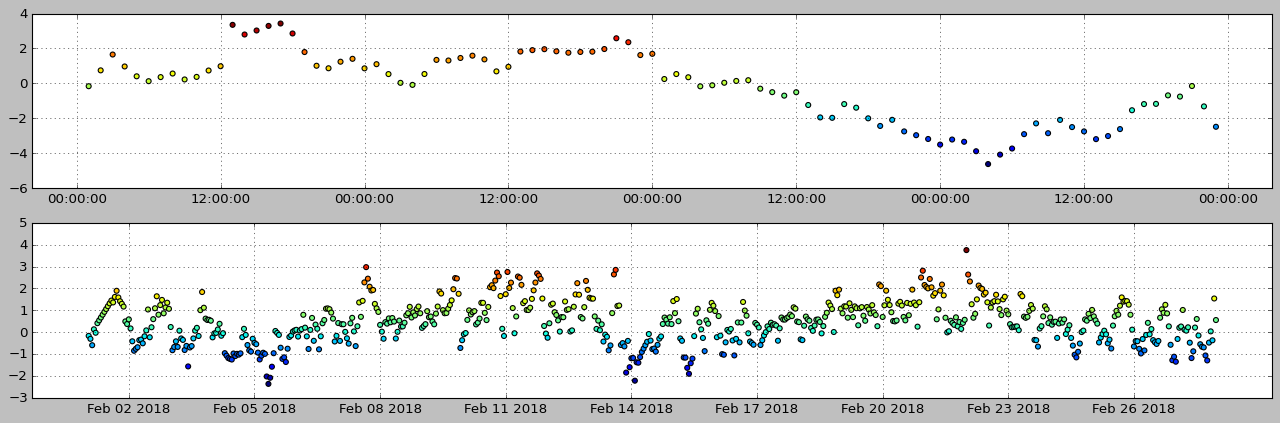

In [177]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(nrows=2, figsize=(20,6))

ax[0].scatter(corte(2018,1,25,2018,1,29).index, corte(2018,1,25,2018,1,29).dife, c=corte(2018,1,25,2018,1,29).dife)
ax[0].grid()

ax[1].scatter(corte(2018,2,1,2018,2,28).index, corte(2018,2,1,2018,2,28).dife, c=corte(2018,2,1,2018,2,28).dife)
ax[1].xaxis.set_major_locator(mdates.DayLocator(np.arange(-3.5,28,3)))
ax[1].grid()

Observa-se que existe uma periodicidade ai. ZScore sobe e desce a medida em que avança no tempo.

### O que isso revela?

A subida e descida da diferença entre os Z Scores mostra diferentes comportamentos na transferência de momentum entre o vento e a superficie do mar.

**Por que?**

Quando Z Score Vento - Z Score Hsig é igual a 0, há uma relação completamente linear entre a velocidade do vento e a altura de onda (conforme visto na regressão linear anteriormente). Isso quer dizer, por exemplo, que a média de vento provoca a média de altura de onda ou que o 90º percentil de vento provoca o 90º percentil de altura de onda.

Quando essa diferença é negativa, significa que percentis menores de velocidade de vento tendem a provocar percentis maiores de altura de onda.

Quando essa diferença é positiva, significa que percentis maiores de velocidade de vento tendem a provocar percentis menores de altura de onda.

**E o que que isso quer dizer?**

Isso pode indicar tendências na transferência de momentum do vento pra superfície do mar. Quando a diferença entre os Z Scores for Positiva, temos ventos fortes provocando ondas pequenas, o que pode ser um indicativo do ínicio da transferência de momentum, uma vez que a superfície do mar não reage instantaneamente à mudanças na velocidade do vento. 

Já quando essa diferença atinge o valor 0, temos que a velocidade do vento implica em mudanças lineares na altura de onda, ou seja, vento médio causa altura de onda média.

Já quando a diferença atinge valores negativos, temos ventos fracos provocando ondas grandes. O que pode ser o indicativo de decrescimento na velocidade dos ventos, uma vez que as ondas ainda estão respondendo a condições de vento anteriores.

**Conclusão**

Portanto, a diferença entre os ZScores ajuda a entender a periodicidade da transferência de momentum do vento pra superfície do mar. 


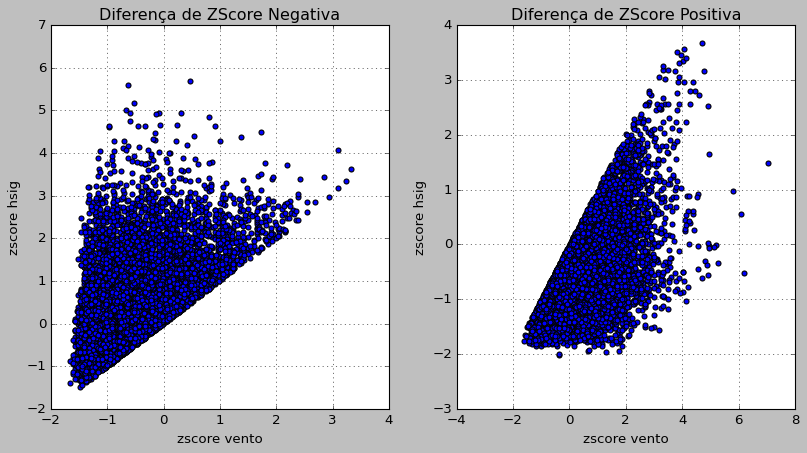

In [188]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))

ax[0].scatter(novo.zscore_vel_vento[novo.dife < 0], novo.zscore_hsig[novo.dife < 0])
ax[0].set_xlabel('zscore vento')
ax[0].set_ylabel('zscore hsig')
ax[0].set_title('Diferença de ZScore Negativa')
ax[0].grid()

ax[1].scatter(novo.zscore_vel_vento[novo.dife > 0], novo.zscore_hsig[novo.dife > 0])
ax[1].set_xlabel('zscore vento')
ax[1].set_ylabel('zscore hsig')
ax[1].set_title('Diferença de ZScore Positiva')
ax[1].grid()

plt.show()

## Análise Wavelet 

Podemos realizar uma análise Wavelet para verificar a periodicidade na alteração da diferença de ZScores. Nessa Análise Wavelet o espectro de potência vai retornar em qual escala de tempo se tem a maior influência na variação da série temporal.

Instalando o Pacote pycwt

In [192]:
%%capture
# instala o wavelets
!pip install pycwt

# primeiro importa o que vamos usar
import pycwt as wavelet
from pycwt.helpers import find
import numpy as np

In [429]:
novo = pd.DataFrame()

novo['hsig'] = boia.Hsig.resample('1H').mean().interpolate(method ='linear', limit_direction ='forward')
novo['wvdir'] =  boia.Avg_Wv_Dir_N.resample('1H').mean().interpolate(method ='linear', limit_direction ='forward')


novo['vel_vento'] = ventos[ventos.columns[0]].resample('1H').mean().interpolate(method ='linear', limit_direction ='forward')
novo['dir_vento'] = ventos[ventos.columns[1]].resample('1H').mean().interpolate(method ='linear', limit_direction ='forward')

from scipy import stats

novo['zscore_vel_vento'] = stats.zscore(novo.vel_vento)
novo['zscore_hsig'] = stats.zscore(novo.hsig)

import numpy as np
nomes = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
direcoes = np.arange(0,361,22.5)

bins = direcoes
labels = nomes
novo['dir_ventos'] = pd.cut(novo['dir_vento'], bins=bins, labels=labels)
novo['dir_ondas'] = pd.cut(novo['wvdir'], bins=bins, labels=labels)

novo['dife'] = novo.zscore_vel_vento - novo.zscore_hsig

novo

,hsig,wvdir,vel_vento,dir_vento,zscore_vel_vento,zscore_hsig,dir_ventos,dir_ondas,dife
2017-08-28 13:00:00,0.950,139.76,3.70,239.5,0.017241,-0.438929,SW,SE,0.456170
2017-08-28 14:00:00,0.890,138.26,4.30,248.0,0.314155,-0.573903,WSW,SE,0.888058
2017-08-28 15:00:00,0.905,139.76,4.70,238.5,0.512098,-0.540159,SW,SE,1.052257
2017-08-28 16:00:00,0.965,137.76,3.95,230.5,0.140955,-0.405185,SW,SE,0.546140
2017-08-28 17:00:00,0.910,133.26,2.65,227.5,-0.502359,-0.528911,SW,ESE,0.026552
...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,0.920,114.03,7.20,141.0,1.749241,-0.506416,SE,ESE,2.255657
2019-12-31 20:00:00,0.915,119.53,6.10,136.5,1.204898,-0.517664,SE,ESE,1.722562
2019-12-31 21:00:00,0.840,132.03,2.05,173.5,-0.799273,-0.686381,SSE,ESE,-0.112892
2019-12-31 22:00:00,0.790,137.03,1.05,242.0,-1.294131,-0.798859,SW,SE,-0.495271


In [412]:
# algumas definições
title = 'Diferenças entre ZScore'
label = 'Boia RJ-4'
units = ''
t0 = 0
dt = 1 # quero em dia [MUITO IMPORTANTE!]

dat = np.array(novo.dife) # simplesmente converte o meu Dataframe para um array usando o numpy
# artificialmente cria o vetor de tempo em decyears (pode ser que tenha outra maneira mais eficiente de fazer isso)
N = dat.size
t = np.arange(0, N) * dt + t0

In [413]:
p = np.polyfit(t - t0, dat, 1) # usando o polyfit para normalizar o dado
dat_notrend = dat - np.polyval(p, t - t0)
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset

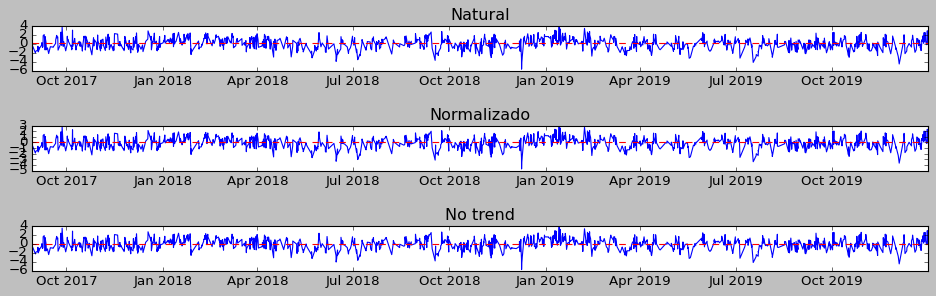

In [414]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, figsize=(12,4))
ax[0].plot(novo.dife.index,dat)
ax[0].set_title('Natural')
ax[0].axhline(y=dat.mean(),linestyle='--',color='r')

ax[1].plot(novo.dife.index,dat_norm)
ax[1].set_title('Normalizado')
ax[1].axhline(y=dat_norm.mean(),linestyle='--',color='r')

ax[2].plot(novo.dife.index,dat_notrend)
ax[2].set_title('No trend')
#ax[2].set_xlabel('Tempo em meses')
ax[2].axhline(y=dat_notrend.mean(),linestyle='--',color='r')

plt.tight_layout(pad=1.5)
plt.show()

In [421]:
mother = wavelet.Morlet(6) # Segundo grindsted, 6 é o valor mais adequado para extração de recursos
s0 = 1 * dt  # menor escala da wavelet / escolhi um mês
dj = 1/6  # 10 sub-oitavas por oitavas
J =  10 / dj  # 10 potências de dois com sub-oitavas dj
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelação para ruído vermelho !!!! muito importante !!!!!
alpha

0.6169107601861327

In [422]:
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat, dt, dj, s0, J, mother) # usando o dado não normalizado
#wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat, dt, dj, s0, J,mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

In [423]:
power = (np.abs(wave)) ** 2
fft_power = np.abs(fft) ** 2
period = 1 / freqs

In [424]:
print(f'Os periodos (em horas) são {period}')

Os periodos (em horas) são [1.03304365e+00 1.15955229e+00 1.30155344e+00 1.46094434e+00
 1.63985457e+00 1.84067452e+00 2.06608730e+00 2.31910458e+00
 2.60310687e+00 2.92188867e+00 3.27970915e+00 3.68134905e+00
 4.13217459e+00 4.63820916e+00 5.20621375e+00 5.84377735e+00
 6.55941829e+00 7.36269809e+00 8.26434918e+00 9.27641831e+00
 1.04124275e+01 1.16875547e+01 1.31188366e+01 1.47253962e+01
 1.65286984e+01 1.85528366e+01 2.08248550e+01 2.33751094e+01
 2.62376732e+01 2.94507924e+01 3.30573967e+01 3.71056732e+01
 4.16497100e+01 4.67502188e+01 5.24753463e+01 5.89015847e+01
 6.61147935e+01 7.42113465e+01 8.32994200e+01 9.35004376e+01
 1.04950693e+02 1.17803169e+02 1.32229587e+02 1.48422693e+02
 1.66598840e+02 1.87000875e+02 2.09901385e+02 2.35606339e+02
 2.64459174e+02 2.96845386e+02 3.33197680e+02 3.74001750e+02
 4.19802771e+02 4.71212678e+02 5.28918348e+02 5.93690772e+02
 6.66395360e+02 7.48003501e+02 8.39605541e+02 9.42425356e+02
 1.05783670e+03]


In [425]:
mysig = 0.95

signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=mysig, #<---- veja 
                                         wavelet=mother)
sig95 = np.ones([1, N]) * signif[:, None]
sig95 = power / sig95

glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=mysig, dof=dof, #<---- veja
                                        wavelet=mother)

sel = find((period >= period.min()) & (period <= period.max()))
Cdelta = mother.cdelta
scale_avg = (scales * np.ones((N, 1))).transpose()
scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
                                             significance_level=mysig, #<---- veja
                                             dof=[scales[sel[0]],
                                                  scales[sel[-1]]],
                                             wavelet=mother)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


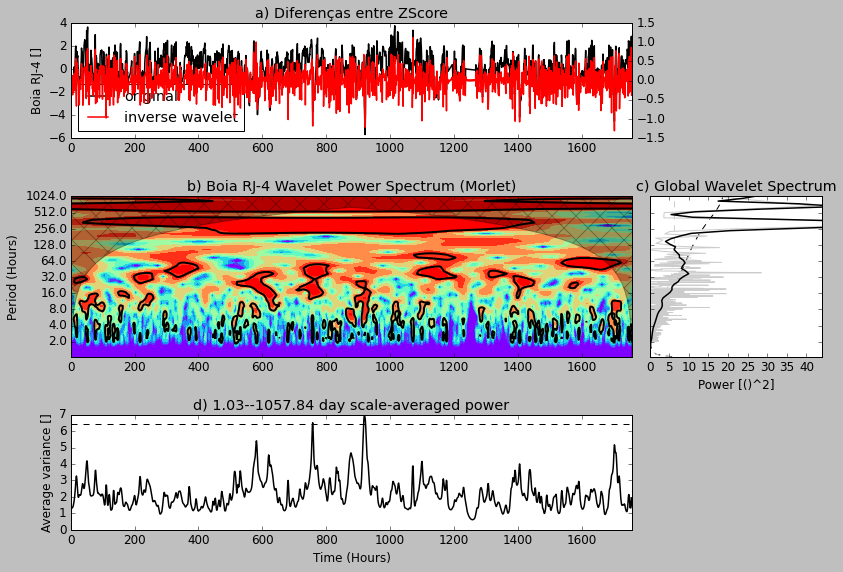

In [426]:
from matplotlib import pyplot

# Prepare the figure
pyplot.close('all')
pyplot.ioff()
figprops = dict(figsize=(12, 8), dpi=72)
fig = pyplot.figure(**figprops)

# Primeiro sub-gráfico, a anomalia da série temporal original e 
# wavelet inversa.
ax = pyplot.axes([0.1, 0.75, 0.65, 0.2])
lns1 = ax.plot(t, dat, 'k', linewidth=1.5,label='original')
ax2 = ax.twinx()

lns2 = ax2.plot(t, iwave, '-', linewidth=1.5, color='r',label='inverse wavelet')
# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))

# Segundo sub-gráfico, o espectro de potência da wavelet normalizada e significância
# linhas de contorno niveladas e cone da área hachurada de influencia. Observe aquele período
# escala é logarítmica.
bx = pyplot.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16] # escala em log2!
bx.contourf(t, np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=pyplot.cm.rainbow) # aplica log2 em toda
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, np.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(np.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        np.concatenate([np.log2(coi), [1e-9], np.log2(period[-1:]),
                           np.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (Hours)')
#
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
bx.set_yticks(np.log2(Yticks))
bx.set_yticklabels(Yticks)#

# Terceiro sub-gráfico, wavelet global e espectros de potência de Fourier e teóricos
# espectro de ruído. Observe que a escala do período é logarítmica.
cx = pyplot.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
cx.plot(glbl_signif, np.log2(period), 'k--')
cx.plot(var * fft_theor, np.log2(period), '--', color='#cccccc')
cx.plot(var * fft_power, np.log2(1./fftfreqs), '-', color='#cccccc',
        linewidth=1.)
cx.plot(var * glbl_power, np.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
cx.set_xlim([0, glbl_power.max() + var])
cx.set_ylim(np.log2([period.min(), period.max()]))
cx.set_yticks(np.log2(Yticks))
cx.set_yticklabels(Yticks)
pyplot.setp(cx.get_yticklabels(), visible=False)

# Quarto sub-gráfico, o espectro de ondas médias da escala.
dx = pyplot.axes([0.1, 0.07, 0.65, 0.2], sharex=ax)
dx.axhline(scale_avg_signif, color='k', linestyle='--', linewidth=1.)
dx.plot(t, scale_avg, 'k-', linewidth=1.5)
dx.set_title(f'd) {period.min():.2f}--{period.max():.2f} day scale-averaged power')
dx.set_xlabel('Time (Hours)')
dx.set_ylabel(r'Average variance [{}]'.format(units))
ax.set_xlim([t.min(), t.max()])

pyplot.show()

A maior variância portanto, está entre as 2 e 8 horas pra um período de 58 dias (aprox. 2 meses).

Logo, dentro de 2 meses, essas variações ocorrem dentro de 2 a 8 horas. Provavelmente é o tempo que leva para ocorrer as mudanças na altura de onda.